In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [32]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [77]:
df.shape

(131662, 29)

In [33]:
### Центрируем данные

### Your code is here

X_centered = X - X.mean()
print(X.sum())

Trip_Distance                    5.819580e+06
Customer_Since_Months            7.920670e+05
Life_Style_Index                 3.688443e+05
Customer_Rating                  3.751653e+05
Cancellation_Last_1Month         1.030700e+05
Var1                             8.225568e+06
Var2                             6.741463e+06
Var3                             9.887687e+06
Type_of_Cab_B                    5.134600e+04
Type_of_Cab_C                    2.812200e+04
Type_of_Cab_D                    1.899100e+04
Type_of_Cab_E                    1.163400e+04
Confidence_Life_Style_Index_B    6.054800e+04
Confidence_Life_Style_Index_C    3.596700e+04
Destination_Type_B               2.955500e+04
Destination_Type_C               7.484000e+03
Destination_Type_D               6.588000e+03
Destination_Type_E               2.717000e+03
Destination_Type_F               1.950000e+03
Destination_Type_G               1.489000e+03
Destination_Type_H               1.260000e+03
Destination_Type_I               8

In [34]:
from sklearn.decomposition import PCA

### Your code is here

pca = PCA(n_components=2)

PCA_dataset = pca.fit_transform(X)

PCA_dataset_conc = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2'])

pca.explained_variance_ratio_

array([0.63176117, 0.21129863])

**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


In [35]:
### Your code is here
first_component_corr = X.corrwith(PCA_dataset_conc.PCA_1)
second_component_corr = X.corrwith(PCA_dataset_conc.PCA_2)

corr_dataset = pd.concat((first_component_corr, second_component_corr), axis=1)
corr_dataset.columns = ['PCA_1', 'PCA_2']
corr_dataset[(corr_dataset['PCA_1'] >= 0.5) | (corr_dataset['PCA_2'] >= 0.5) ]

,PCA_1,PCA_2
Trip_Distance,0.997767,0.01841
Var1,-0.048532,0.99860


In [61]:
X.corr()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
Trip_Distance,1.000000,0.114413,0.468332,-0.054654,-0.007686,-0.031388,0.200456,0.231706,-0.049238,-0.011554,...,0.010783,-0.078761,-0.065450,-0.067025,-0.070772,-0.032169,0.006428,-0.009844,-0.027335,0.002173
Customer_Since_Months,0.114413,1.000000,0.119279,-0.048969,-0.006180,-0.000977,0.041814,0.110851,-0.002355,0.004740,...,-0.020596,-0.023704,-0.005812,-0.038896,0.001861,-0.033298,-0.011319,0.001978,-0.021416,0.001326
Life_Style_Index,0.468332,0.119279,1.000000,0.189165,0.068188,-0.045710,0.215944,0.303324,-0.002509,-0.033352,...,0.021958,-0.027208,-0.008661,-0.018124,-0.015995,-0.006097,0.003144,0.008153,-0.026124,0.000626
Customer_Rating,-0.054654,-0.048969,0.189165,1.000000,0.003595,-0.005398,-0.302968,-0.227531,0.027020,-0.031793,...,0.055861,0.058156,0.012988,0.022421,0.012134,0.027700,0.033101,0.010281,0.018762,0.000468
Cancellation_Last_1Month,-0.007686,-0.006180,0.068188,0.003595,1.000000,0.011711,0.095830,0.128686,-0.051113,0.026167,...,0.028450,0.004040,0.002679,0.007901,0.002417,0.011404,0.037134,0.003636,0.004370,0.002307
Var1,-0.031388,-0.000977,-0.045710,-0.005398,0.011711,1.000000,-0.025133,-0.020892,0.008309,-0.002987,...,-0.006899,0.003675,-0.001149,0.000149,0.003012,0.002711,0.002638,0.000995,-0.005564,0.000619
Var2,0.200456,0.041814,0.215944,-0.302968,0.095830,-0.025133,1.000000,0.683437,-0.007217,-0.005590,...,-0.032692,-0.042712,-0.016374,-0.024090,-0.020074,-0.017317,-0.015042,-0.002572,-0.011555,0.003183
Var3,0.231706,0.110851,0.303324,-0.227531,0.128686,-0.020892,0.683437,1.000000,-0.003357,-0.012346,...,-0.025378,-0.034315,-0.007976,-0.025787,-0.016411,-0.028876,-0.007760,-0.004894,-0.016493,0.003520
Type_of_Cab_B,-0.049238,-0.002355,-0.002509,0.027020,-0.051113,0.008309,-0.007217,-0.003357,1.000000,-0.416698,...,-0.014112,-0.000101,-0.013176,-0.011938,-0.010108,-0.000693,-0.005531,-0.002502,0.001017,-0.000635
Type_of_Cab_C,-0.011554,0.004740,-0.033352,-0.031793,0.026167,-0.002987,-0.005590,-0.012346,-0.416698,1.000000,...,-0.012504,-0.006667,-0.004402,-0.006778,-0.003695,-0.010663,-0.002483,-0.003393,0.000726,-0.001079


**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

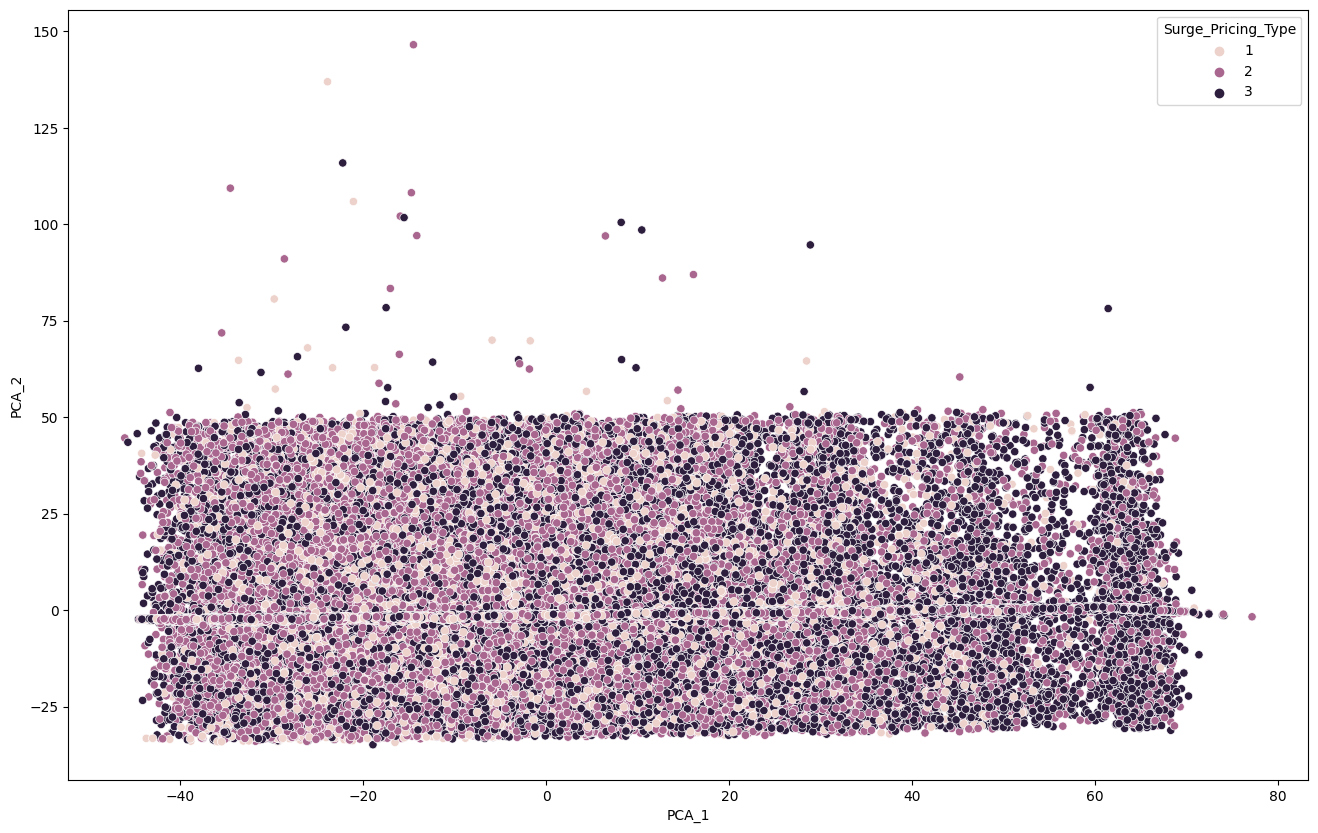

In [36]:
### Your code is here
import seaborn as sns
PCA_dataset_v = pd.concat((PCA_dataset_conc, y), axis=1)

fig = plt.figure()
fig.set_size_inches(16, 10)

sns.scatterplot(data=PCA_dataset_v, x='PCA_1', y='PCA_2', hue='Surge_Pricing_Type')
plt.show()

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [37]:
### Your code is here

pca = PCA(n_components=3)

PCA_dataset = pca.fit_transform(X)

PCA_dataset_3d = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2', 'PCA_3'])





In [40]:
first_component_corr = X.corrwith(PCA_dataset_3d.PCA_1)
second_component_corr = X.corrwith(PCA_dataset_3d.PCA_2)
third_component_corr = X.corrwith(PCA_dataset_3d.PCA_3)

corr_dataset = pd.concat((first_component_corr, second_component_corr, third_component_corr), axis=1)
corr_dataset.columns = ['PCA_1', 'PCA_2', 'PCA_3']
corr_dataset[(corr_dataset['PCA_1'] >= 0.5) | (corr_dataset['PCA_2'] >= 0.5) | (corr_dataset['PCA_3'] >= 0.5) ]



,PCA_1,PCA_2,PCA_3
Trip_Distance,0.997767,0.018410,-0.064176
Var1,-0.048532,0.998600,0.021003
Var2,0.247178,-0.028448,0.705159
Var3,0.293819,-0.026583,0.951081


In [62]:
PCA_dataset_3d.corr()

,PCA_1,PCA_2,PCA_3
PCA_1,1.000000e+00,2.250964e-17,2.437187e-17
PCA_2,2.250964e-17,1.000000e+00,-1.179222e-15
PCA_3,2.437187e-17,-1.179222e-15,1.000000e+00


In [42]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(PCA_dataset_3d))

Top Absolute Correlations
PCA_2  PCA_3    1.179222e-15
PCA_1  PCA_3    2.437187e-17
       PCA_2    2.250964e-17
dtype: float64


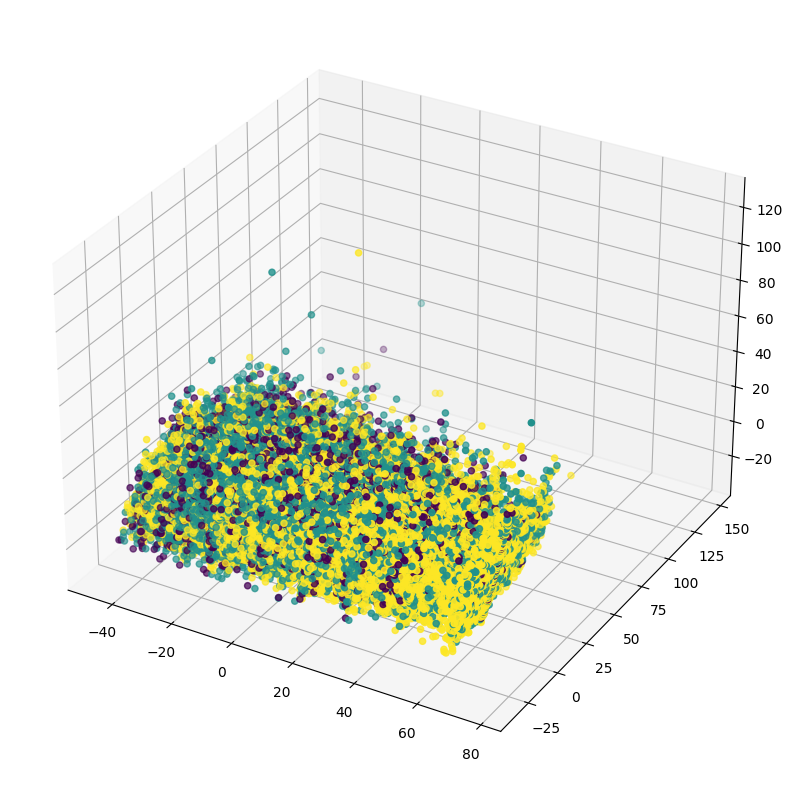

In [47]:
PCA_dataset_3dv = pd.concat((PCA_dataset_3d, y), axis=1)
fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')
colors = PCA_dataset_3dv['Surge_Pricing_Type'].replace(['1', '2', '3'],
                                            ['orange', 'green', 'red'])
ax.scatter3D(PCA_dataset_3d['PCA_1'], 
             PCA_dataset_3d['PCA_2'],
             PCA_dataset_3d['PCA_3'], 
             c=colors)
plt.show()

**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [48]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [50]:
### Your code is here

pipe_1 = Pipeline([("scaler", StandardScaler()),
                 ("PCA", PCA(n_components=2)),
                 ("model", LogisticRegression())])

pipe_1.fit(X_train, y_train)

param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}

search = GridSearchCV(pipe_1, param_grid)

search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

pipe_1.set_params(model__C=search.best_params_['model__C'], 
                model__penalty=search.best_params_['model__penalty'])
pipe_1.fit(X_train, y_train)

print(classification_report(y_test, pipe_1.predict(X_test), digits=3))

Best parameter (CV score=0.48054):
{'model__C': 0.0001, 'model__penalty': 'l2'}
              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.479     0.699     0.568     11349
           3      0.496     0.504     0.500      9612

    accuracy                          0.485     26333
   macro avg      0.325     0.401     0.356     26333
weighted avg      0.387     0.485     0.427     26333



In [51]:
pipe_2 = Pipeline([("scaler", StandardScaler()),
               #  ("PCA", PCA(n_components=2)),
                 ("model", LogisticRegression())])

pipe_2.fit(X_train, y_train)

param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}

search = GridSearchCV(pipe_2, param_grid)

search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

pipe_2.set_params(model__C=search.best_params_['model__C'], 
                model__penalty=search.best_params_['model__penalty'])
pipe_2.fit(X_train, y_train)

print(classification_report(y_test, pipe_1.predict(X_test), digits=3))

Best parameter (CV score=0.68039):
{'model__C': 0.001, 'model__penalty': 'l2'}
              precision    recall  f1-score   support

           1      0.746     0.532     0.621      5372
           2      0.636     0.830     0.720     11349
           3      0.736     0.589     0.655      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.665     26333
weighted avg      0.695     0.681     0.676     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [52]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [55]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    
    ### Your code is here
    accuracy_dict[n_components] = train_pca_i(n_components, X_train, y_train)[0]
    f1_score_dict[n_components] = train_pca_i(n_components, X_train, y_train)[1]
    

CPU times: total: 1min 58s
Wall time: 2min 29s


In [56]:
f1_score_dict

{2: 0.4277726764788261,
 4: 0.47632817337294964,
 8: 0.5208321263514413,
 16: 0.5273658176756449,
 28: 0.6760757307801638}

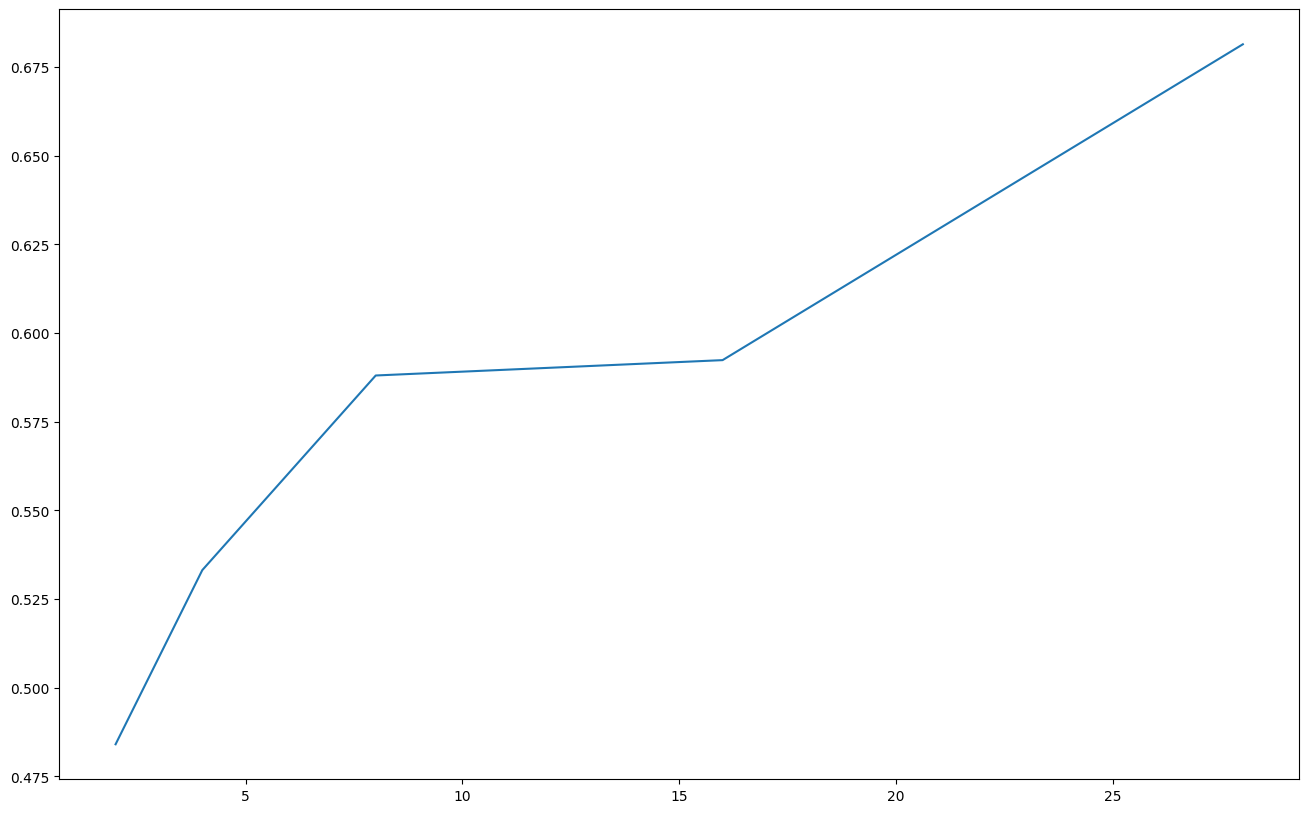

In [57]:
fig = plt.figure()
fig.set_size_inches(16, 10)

plt.plot(list(accuracy_dict.keys()), list(accuracy_dict.values()))

plt.show()

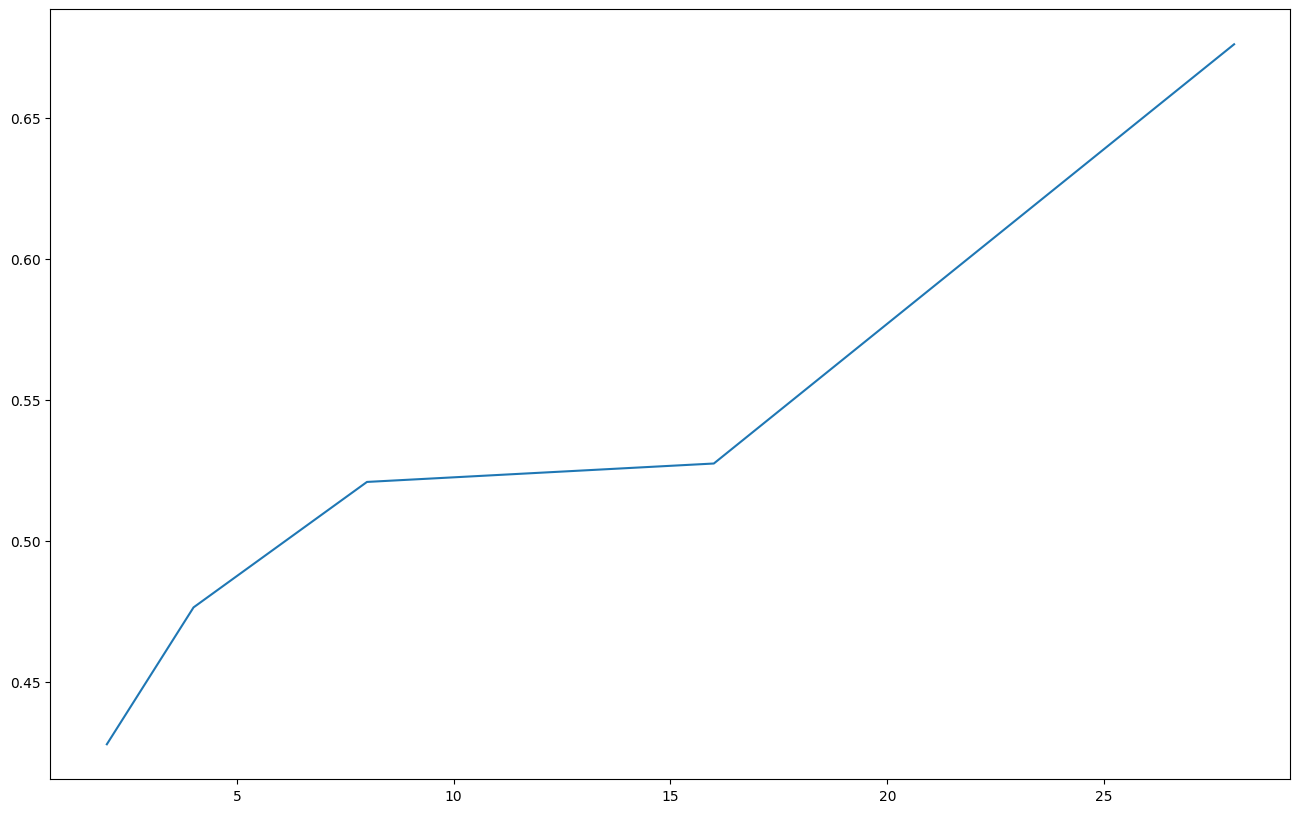

In [58]:
fig = plt.figure()
fig.set_size_inches(16, 10)

plt.plot(list(f1_score_dict.keys()), list(f1_score_dict.values()))

plt.show()

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [59]:
from sklearn.manifold import TSNE

### Your code is here
X_tsne = TSNE(n_components=2).fit_transform(X)


In [63]:
X_tsne

array([[ -9.857614  ,  41.953655  ],
       [-13.768044  ,  23.532526  ],
       [ 12.800251  ,  -2.9574559 ],
       ...,
       [ 20.089119  ,  -0.20650269],
       [ -1.2314777 ,   2.0904207 ],
       [-35.399525  ,  -9.329428  ]], dtype=float32)

In [70]:
X_tsne = np.concatenate((X_tsne, y.values.reshape(-1, 1)),
                               axis=1)

X_tsne = pd.DataFrame(X_tsne, columns=['Tsne_1st_component',
                                       'Tsne_2nd_component',
                                       'SEGMENT'])

ValueError: Shape of passed values is (131662, 4), indices imply (131662, 3)

<AxesSubplot:xlabel='Tsne_1st_component', ylabel='Tsne_2nd_component'>

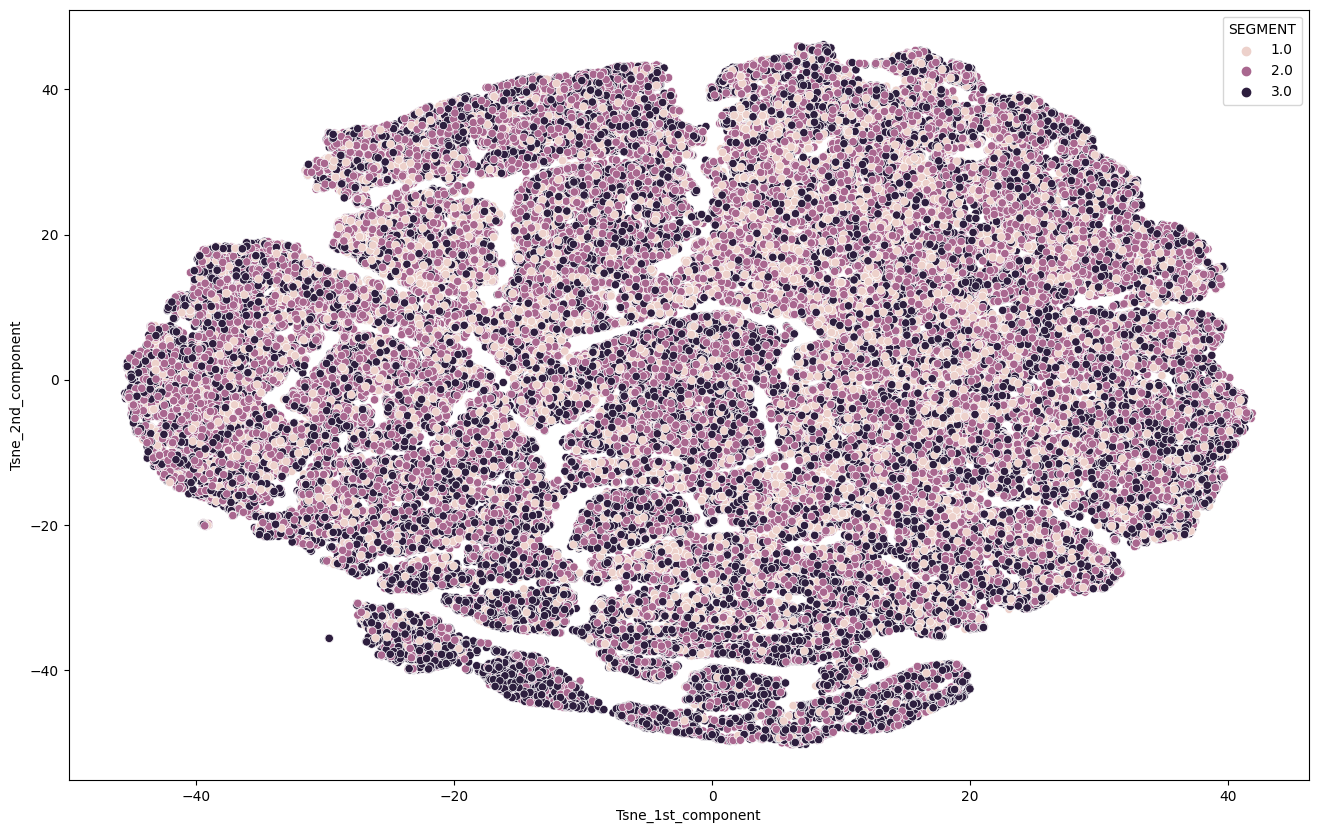

In [67]:
fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=X_tsne, x="Tsne_1st_component", 
                y="Tsne_2nd_component", 
                hue="SEGMENT")

**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [68]:
### Your code is here
X_tsne_3d = TSNE(n_components=3).fit_transform(X)

X_tsne_3d


array([[  8.047917  ,   0.87676567,  -1.2041464 ],
       [ 17.265354  ,  -9.186901  ,   7.681101  ],
       [  0.9507411 ,  10.602217  ,   0.31324992],
       ...,
       [  0.56435883,  -6.6180778 ,   1.8777777 ],
       [  3.9354224 , -19.027714  ,   6.622741  ],
       [  1.3368824 ,  -8.52575   ,  11.334983  ]], dtype=float32)

In [71]:
X_tsne_3d = np.concatenate((X_tsne_3d, y.values.reshape(-1, 1)),
                               axis=1)

X_tsne_3d = pd.DataFrame(X_tsne_3d, columns=['Tsne_1st_component',
                                             'Tsne_2nd_component',
                                             'Tsne_3rd_component',
                                             'Surge_Pricing_Type'])

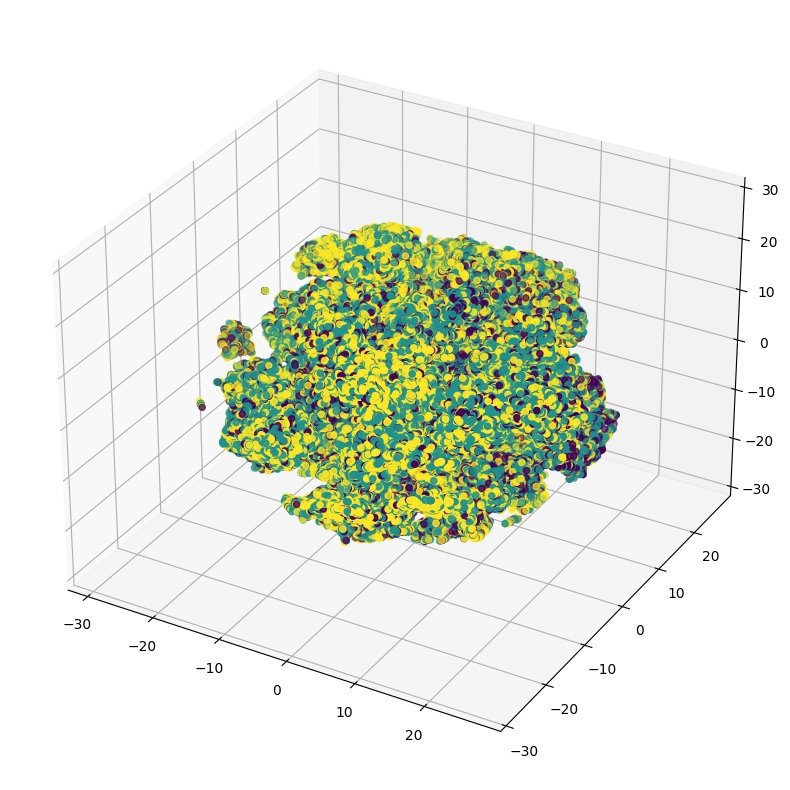

In [73]:
fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

colors = X_tsne_3d['Surge_Pricing_Type'].replace(['1', '2', '3'],
                                      ['orange', 'green', 'red'])

ax.scatter3D(X_tsne_3d['Tsne_1st_component'], 
             X_tsne_3d['Tsne_2nd_component'],
             X_tsne_3d['Tsne_3rd_component'], 
             c=colors)

Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!